In this Dataset we have details of cars of different brands and its prices varies as per different parameters as mentioned in the datasert. We will analyse this dataset and do Complete Exploratory Data Analysis & Pre-Processing and clean the data.

In [22]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [25]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

Above info shoows 41 instances of missing values in the form of "?"

In [26]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: horsepower, dtype: int64

Above info shoows 2 instances of missing values in the form of "?"

Handling Missing Values with Simle Imputer

In [27]:
df["normalized-losses"].replace("?", np.nan, inplace=True)
df["horsepower"].replace("?", np.nan, inplace=True)

In [28]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean")
df[["normalized-losses", "horsepower"]] = si.fit_transform(df[["normalized-losses", "horsepower"]])

In [32]:
features = df.iloc[:, :-1]
target = df.iloc[:, -1]

Checking for Outliers

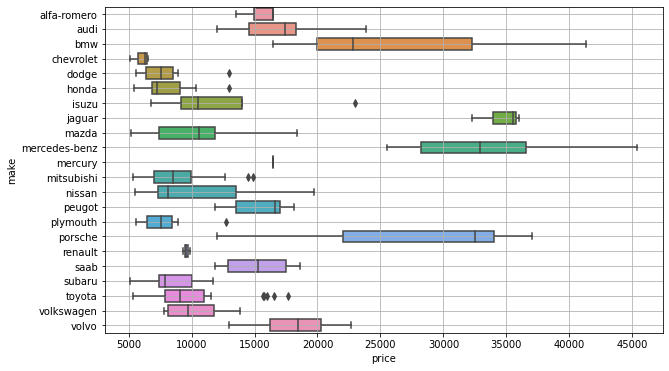

In [41]:
plt.figure(figsize = (10,6))
sns.boxplot(data = features, x = target, y = "make")
plt.grid()

Handling Outliers

In [61]:
i = features[(features.make=="dodge")&(target>10000)].index
features.drop(i, axis=0, inplace=True)

i = features[(features.make=="honda")&(target>10000)].index
features.drop(i, axis=0, inplace=True)

i = features[(features.make=="isuzu")&(target>15000)].index
features.drop(i, axis=0, inplace=True)

i = features[(features.make=="mitsubishi")&(target>14000)].index
features.drop(i, axis=0, inplace=True)

i = features[(features.make=="plymouth")&(target>10000)].index
features.drop(i, axis=0, inplace=True)

i = features[(features.make=="toyota")&(target>15000)].index
features.drop(i, axis=0, inplace=True)

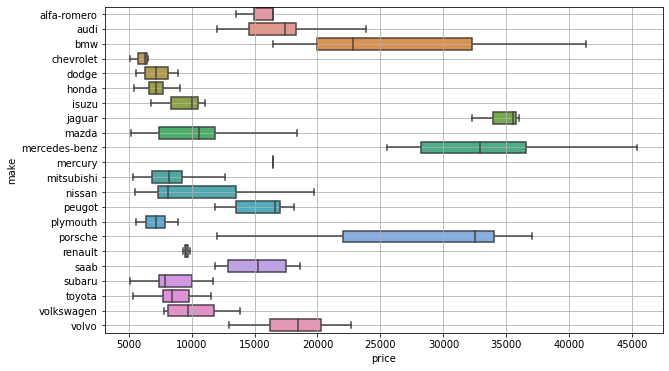

In [43]:
plt.figure(figsize = (10,6))
sns.boxplot(data = features, x = target, y = "make")
plt.grid()

Checking for & Removing Skewness

In [44]:
colname = features.select_dtypes(["int64", "float64"]).columns

In [45]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [58]:
from scipy.stats import skew

symboling
0.20747173686867265
normalized-losses
0.8375438312442246
width
0.9227158641434647
height
0.005653273749726229
engine-size
2.03689013414227
horsepower
1.542680306160047
city-mpg
0.5998249503840676
highway-mpg
0.47835862387209765


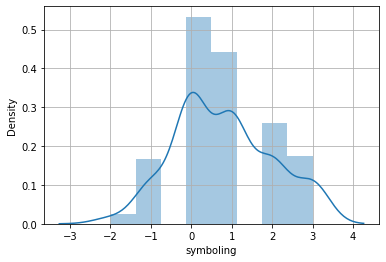

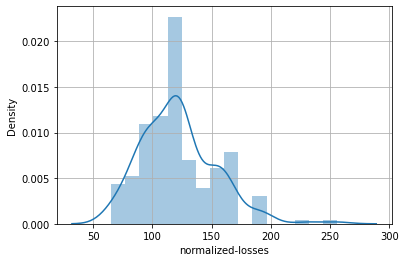

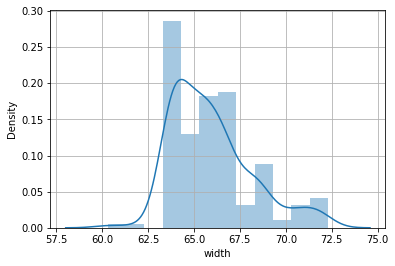

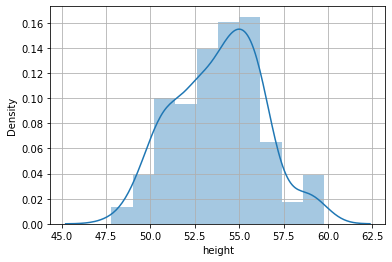

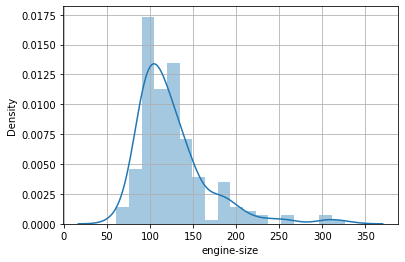

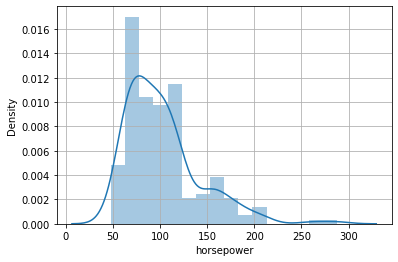

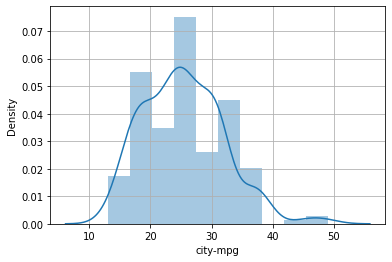

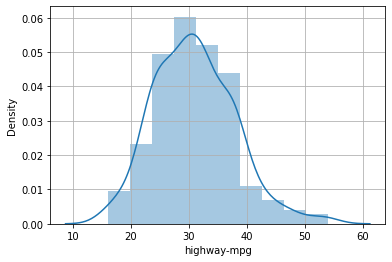

In [47]:
for col in features[colname]:
  print(col)
  print(skew(features[col]))
  plt.figure()
  sns.distplot(features[col])
  plt.grid()

In [48]:
pd.concat([features, target], axis=1).corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.446728,-0.279815,-0.522524,-0.154905,0.025744,0.008085,0.085358,-0.096957
normalized-losses,0.446728,1.000000,0.057966,-0.373463,0.087528,0.181530,-0.211858,-0.167847,0.127657
width,-0.279815,0.057966,1.000000,0.300101,0.737350,0.644893,-0.643574,-0.679967,0.732833
height,-0.522524,-0.373463,0.300101,1.000000,0.094416,-0.078694,-0.079620,-0.143610,0.145765
engine-size,-0.154905,0.087528,0.737350,0.094416,1.000000,0.803978,-0.642932,-0.667136,0.869468
horsepower,0.025744,0.181530,0.644893,-0.078694,0.803978,1.000000,-0.797159,-0.760894,0.768885
city-mpg,0.008085,-0.211858,-0.643574,-0.079620,-0.642932,-0.797159,1.000000,0.970119,-0.680615
highway-mpg,0.085358,-0.167847,-0.679967,-0.143610,-0.667136,-0.760894,0.970119,1.000000,-0.704903
price,-0.096957,0.127657,0.732833,0.145765,0.869468,0.768885,-0.680615,-0.704903,1.000000


In [49]:
pd.concat([features, target], axis=1).corr()["price"].sort_values()

highway-mpg         -0.704903
city-mpg            -0.680615
symboling           -0.096957
normalized-losses    0.127657
height               0.145765
width                0.732833
horsepower           0.768885
engine-size          0.869468
price                1.000000
Name: price, dtype: float64

- Above values shows that except height column, all other columns are skewd which we should remove, but we need to check following before removing them
  - If the columns which has skewness is showing good correlation with the target, do not remove skewness
  - If the columns which has skewness has some negative values, do not remove skewness (since log and sqrt value of -ve number is nan and we have 2 methods of removing skeweness i.e. logarithmic method or square root method)

- From above correlations and pointers we conclude that we need to remove skewness from "symboling" & "normalized-losses" which has less correlation (since height is very less skewed, or not skewed). But, symboling has -ve values hence not removing its skewness

**Removing skewness using logarithmic method**
- since log of any number is lesser than sqrt, hence we get lesser skewness

In [52]:
features["normalized-losses"] = np.log(features["normalized-losses"])
features["normalized-losses"]

0      4.804021
1      4.804021
2      4.804021
3      5.099866
4      5.099866
         ...   
200    4.553877
201    4.553877
202    4.553877
203    4.553877
204    4.553877
Name: normalized-losses, Length: 192, dtype: float64

In [53]:
skew(features["normalized-losses"])

0.004020880712921842

- Thus skewness reuced from 0.84 to 0.004

Handling Categorical Data
- The process of converting categorical data into numerical data is called encoding

In [55]:
catcol = features.select_dtypes(object).columns

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
features[catcol] = oe.fit_transform(features[catcol])

In [57]:
features

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27
